In [3]:
from itertools import product

n_qubits = 2
m_ancillas = 3

permutations = [''.join(bits) for bits in product('IX', repeat= n_qubits + m_ancillas)] #Todas las posibles formas de aplicar X en 1, 2, 3, 4 o todos los qubits 
basis_states = [''.join(bits) for bits in product('01', repeat= n_qubits + m_ancillas)] #Todos los posibles estados del sistema

dict_states = {idx: state for idx, state in enumerate(basis_states)} #Asocia el estado a un índice

print(f'Posibles estados del sistema: {dict_states} \n')

for permutation in permutations:
    new_dict_states = dict_states.copy()
    indexes = [i for i, c in enumerate(permutation) if c == 'X'] #Identifica la posición en la que se encuentra X
    print(f'Compuertas aplicadas: {permutation} \n')
    for idx in range(len(dict_states)): #Modifica los 0 por 1 y los 1 por 0, según la posición de X
        for i in indexes:
            if new_dict_states[idx][i]=='1':
                new_dict_states[idx] = new_dict_states[idx][:i] + '0' + new_dict_states[idx][i+1:]
            else:
                new_dict_states[idx] = new_dict_states[idx][:i] + '1' + new_dict_states[idx][i+1:]
    
    states = dict_states.items()
    new_states = new_dict_states.items()
    lista = []
    for idx, state in states: #Se comparan las posiciones antiguas con las nuevas
       for new_idx, new_state in new_states:
            if new_state == state:
                lista.append((idx, new_idx))
    #print(lista) #Esta lista tiene todos los cambios de índice
    lista_sin_duplicados = list({tuple(sorted(t)) for t in lista}) #Elimina, por ejemplo, una de las tuplas (2,3) o (3,2), porque indicarían la misma permutación
    print(sorted(lista_sin_duplicados))



    


Posibles estados del sistema: {0: '00000', 1: '00001', 2: '00010', 3: '00011', 4: '00100', 5: '00101', 6: '00110', 7: '00111', 8: '01000', 9: '01001', 10: '01010', 11: '01011', 12: '01100', 13: '01101', 14: '01110', 15: '01111', 16: '10000', 17: '10001', 18: '10010', 19: '10011', 20: '10100', 21: '10101', 22: '10110', 23: '10111', 24: '11000', 25: '11001', 26: '11010', 27: '11011', 28: '11100', 29: '11101', 30: '11110', 31: '11111'} 

Compuertas aplicadas: IIIII 

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31)]
Compuertas aplicadas: IIIIX 

[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15), (16, 17), (18, 19), (20, 21), (22, 23), (24, 25), (26, 27), (28, 29), (30, 31)]
Compuertas aplicadas: IIIXI 

[(0, 2), (1, 3), (4

# Generar cualquier transposción de manera arbitraria:




In [9]:
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector


qc = QuantumCircuit(3)

qc.x(0)

Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

efectivamente se considera el 1er qubit como el de mas de la der (menos significativo)

In [10]:
def dictionary_generation(n : int):
    """
    Generates the dictionary associated to the computational basis of n qubits.
    """
    
    # Usamos 'i' como variable del bucle para no confundirla con 'n'
    # Usamos f'{i:0{n}b}' para formatear 'i' con 'n' bits y relleno de ceros
    
    comp_basis_generation = { i : f'{i:0{n}b}' for i in range(2**n)}
    return comp_basis_generation

# --- Ejemplo de uso ---
n_qubits = 3
basis = dictionary_generation(n_qubits)
print(basis)

    

{0: '000', 1: '001', 2: '010', 3: '011', 4: '100', 5: '101', 6: '110', 7: '111'}


In [12]:
def is_power_of_two(n):
    """Chequeo bitwise súper rápido para ver si n es potencia de 2."""
    if n <= 0:
        return False
    return (n & (n - 1)) == 0

def find_bit_transpositions_fast(basis_dict: dict) -> list:
    """
    Encuentra transposiciones de 1 bit usando operaciones bitwise (XOR).
    """
    transpositions = set()
    keys = list(basis_dict.keys()) # Solo necesitamos los enteros
    num_keys = len(keys)

    for i in range(num_keys):
        key1 = keys[i]
        for j in range(i + 1, num_keys):
            key2 = keys[j]
            
            # 1. Hacemos XOR para ver los bits que difieren
            xor_result = key1 ^ key2
            
            # 2. Si el resultado es potencia de 2, solo difiere 1 bit
            if is_power_of_two(xor_result):
                transpositions.add((key1, key2))
                
    return sorted(list(transpositions))


# --- Ejemplo de uso con n=3 ---

def dictionary_generation(n : int):
    """Genera la base computacional para n qubits."""
    return { i : f'{i:0{n}b}' for i in range(2**n)}



# 1. Generamos el diccionario para n=3
base_n3 = dictionary_generation(4)
print(f"Diccionario de entrada (n=3):\n{base_n3}\n")
# --- Prueba con el método rápido ---
print("\n--- Método Rápido (Bitwise) ---")
transposiciones_fast = find_bit_transpositions_fast(base_n3)
print(transposiciones_fast)

Diccionario de entrada (n=3):
{0: '0000', 1: '0001', 2: '0010', 3: '0011', 4: '0100', 5: '0101', 6: '0110', 7: '0111', 8: '1000', 9: '1001', 10: '1010', 11: '1011', 12: '1100', 13: '1101', 14: '1110', 15: '1111'}


--- Método Rápido (Bitwise) ---
[(0, 1), (0, 2), (0, 4), (0, 8), (1, 3), (1, 5), (1, 9), (2, 3), (2, 6), (2, 10), (3, 7), (3, 11), (4, 5), (4, 6), (4, 12), (5, 7), (5, 13), (6, 7), (6, 14), (7, 15), (8, 9), (8, 10), (8, 12), (9, 11), (9, 13), (10, 11), (10, 14), (11, 15), (12, 13), (12, 14), (13, 15), (14, 15)]


In [32]:
import math

def analyze_transpositions(transposition_list: list, n: int) -> list:
    """
    Analiza una lista de transposiciones (pares de claves) para encontrar 
    el bit "target" (el que se voltea) y los bits de "control" (los que no).

    Args:
        transposition_list: La lista de tuplas, ej: [(0, 1), (0, 2), ...].
        n: El número total de bits (qubits).

    Returns:
        Una lista de diccionarios, cada uno describiendo una transposición.
    """
    
    analysis_results = []

    for (key1, key2) in transposition_list:
        
        # 1. Encontrar el bit "Target" (el que se voltea)
        
        # xor_result es la potencia de 2 (1, 2, 4...) que representa el bit flipeado
        xor_result = key1 ^ key2
        
        # log2 nos da el índice del bit contando desde la DERECHA (0, 1, 2...)
        # ej: log2(1) = 0, log2(2) = 1, log2(4) = 2
        target_bit_index_from_right = int(math.log2(xor_result))
        
        # Lo convertimos a índice desde la IZQUIERDA (como en un string)
        # ej: para n=3, el bit 0 (derecha) es el 2 (izquierda)
        target_bit_index = (n - 1) - target_bit_index_from_right

        
        # 2. Encontrar los bits de "Control"
        
        controls = []
        for i in range(n):
            # Si 'i' es el bit target, lo saltamos
            if i == target_bit_index:
                continue
            
            # Convertimos el índice 'i' (izquierda) a un índice (derecha)
            # para poder usar operaciones bitwise
            bit_index_from_right = (n - 1) - i
            
            # Usamos bit-shift y un AND (mask) para extraer el valor del bit
            # (key1 >> bit_index_from_right) mueve el bit 'i' a la posición 0
            # & 1 nos dice si ese bit es 0 o 1
            control_value = (key1 >> bit_index_from_right) & 1
            
            controls.append({'index': i, 'value': control_value})

        # 3. Guardar el resultado
        analysis_results.append({
            'pair': (key1, key2),
            'target_bit': target_bit_index,
            'controls': controls
        })
        
    return analysis_results

# --- Funciones de ayuda de los pasos anteriores ---

def dictionary_generation(n : int):
    """Genera la base computacional para n qubits."""
    return { i : f'{i:0{n}b}' for i in range(2**n)}

def is_power_of_two(n):
    if n <= 0: return False
    return (n & (n - 1)) == 0

def find_bit_transpositions_fast(basis_dict: dict) -> list:
    """Encuentra transposiciones de 1 bit usando XOR."""
    transpositions = set()
    keys = list(basis_dict.keys())
    num_keys = len(keys)
    for i in range(num_keys):
        key1 = keys[i]
        for j in range(i + 1, num_keys):
            key2 = keys[j]
            xor_result = key1 ^ key2
            if is_power_of_two(xor_result):
                transpositions.add((key1, key2))
    return sorted(list(transpositions))


# --- Ejemplo de uso con n=3 ---

n_qubits = 3
base_n3 = dictionary_generation(n_qubits)
transposiciones = find_bit_transpositions_fast(base_n3)

# ¡Ejecutamos la nueva función!
analisis_completo = analyze_transpositions(transposiciones, n_qubits)

# --- Imprimimos los primeros resultados del análisis ---
print(f"Análisis para n={n_qubits} :\n")
for item in analisis_completo:
    print(item)
    #print(f'{len(item['controls'])}' + '\n')

Análisis para n=3 :

{'pair': (0, 1), 'target_bit': 2, 'controls': [{'index': 0, 'value': 0}, {'index': 1, 'value': 0}]}
{'pair': (0, 2), 'target_bit': 1, 'controls': [{'index': 0, 'value': 0}, {'index': 2, 'value': 0}]}
{'pair': (0, 4), 'target_bit': 0, 'controls': [{'index': 1, 'value': 0}, {'index': 2, 'value': 0}]}
{'pair': (1, 3), 'target_bit': 1, 'controls': [{'index': 0, 'value': 0}, {'index': 2, 'value': 1}]}
{'pair': (1, 5), 'target_bit': 0, 'controls': [{'index': 1, 'value': 0}, {'index': 2, 'value': 1}]}
{'pair': (2, 3), 'target_bit': 2, 'controls': [{'index': 0, 'value': 0}, {'index': 1, 'value': 1}]}
{'pair': (2, 6), 'target_bit': 0, 'controls': [{'index': 1, 'value': 1}, {'index': 2, 'value': 0}]}
{'pair': (3, 7), 'target_bit': 0, 'controls': [{'index': 1, 'value': 1}, {'index': 2, 'value': 1}]}
{'pair': (4, 5), 'target_bit': 2, 'controls': [{'index': 0, 'value': 1}, {'index': 1, 'value': 0}]}
{'pair': (4, 6), 'target_bit': 1, 'controls': [{'index': 0, 'value': 1}, {'inde

In [34]:

from qiskit.circuit.library import MCXGate
from qiskit.circuit import QuantumCircuit

def transposition_circuits_associated(dict):
    """recibe el resultado de la función anterior y devuelve
    el qubit asociado a la transposición"""

    ctrl_qbits_dict = dict['controls']
    num_ctrl_qbits = len(ctrl_qbits_dict)


    state_ctrl_str = [str(elem['value']) for elem in ctrl_qbits_dict]
    state_ctrl_str = ''.join(state_ctrl_str)

    list_ctrl_bits = [ elem['index'] for elem in ctrl_qbits_dict]
    idx_target_bit = dict['target_bit']

    list_ctrl_bits.append(idx_target_bit)

    name_transposition = dict['pair']

    mcx_gate = MCXGate(num_ctrl_qubits= num_ctrl_qbits,
                       label= name_transposition,
                       ctrl_state= state_ctrl_str)
    
    qc = QuantumCircuit(int(num_ctrl_qbits + 1))

    qc.append(mcx_gate, list_ctrl_bits)

    return qc, name_transposition
    

def generate_circuits_transpositions(list):

    info_final_transpositions = []
    for transp_info_dict in list:
        qc, trans = transposition_circuits_associated(transp_info_dict)

        info_final_transpositions.append(
            { trans : qc}
        )

    return info_final_transpositions



info_final = generate_circuits_transpositions(analisis_completo)



TypeError: label expects a string or None

In [ ]:
from qiskit.circuit.library import MCXGate
from qiskit.circuit import QuantumCircuit

def transposition_circuits_associated(transp_info_dict : dict):
    """
    Recibe el diccionario de info de UNA transposición y devuelve
    el circuito cuántico asociado y el nombre de la transposición.
    """

    ctrl_qbits_dict = transp_info_dict['controls']
    num_ctrl_qbits = len(ctrl_qbits_dict)

    # --- Lógica de Controles ---
    # (Tu lógica aquí es 100% correcta, ya que mi función anterior
    # ordena los controles por índice)
    
    # 1. El bitstring del estado de control (ej: '010')
    state_ctrl_str_list = [str(elem['value']) for elem in ctrl_qbits_dict]
    state_ctrl_str = ''.join(state_ctrl_str_list)

    # 2. La lista de índices de qubits de control (ej: [0, 2, 3])
    list_ctrl_bits = [ elem['index'] for elem in ctrl_qbits_dict]
    
    # --- Lógica del Target ---
    idx_target_bit = transp_info_dict['target_bit']

    # --- Lógica del Label (Aquí está el arreglo) ---
    name_transposition_tuple = transp_info_dict['pair']
    # Convertimos la tupla (0, 1) al string "(0, 1)"
    name_transposition_label = str(name_transposition_tuple)

    # --- Creación del Circuito ---

    # 1. Definimos la compuerta
    mcx_gate = MCXGate(num_ctrl_qubits= num_ctrl_qbits,
                       label= name_transposition_label, # Usamos el string
                       ctrl_state= state_ctrl_str)
    
    # 2. Creamos la lista final de qubits (controles + target)
    # Qiskit espera [control_1, ..., control_n, target]
    qubit_list = list_ctrl_bits
    qubit_list.append(idx_target_bit)
    
    # 3. Creamos el circuito (n = controles + 1 target)
    n_qubits = num_ctrl_qbits + 1
    qc = QuantumCircuit(n_qubits)

    # 4. Añadimos la compuerta
    qc.append(mcx_gate, qubit_list)

    # Devolvemos la tupla (par) original como clave
    return qc, name_transposition_tuple
    

def generate_circuits_transpositions(analisis_completo: list):
    """
    Recibe la lista completa de análisis y la convierte en
    una lista de diccionarios { (par): circuito }
    """
    info_final_transpositions = []
    
    # ¡Cuidado! No llames a tu variable 'list', es una palabra reservada.
    # La cambié por 'analisis_completo'
    for transp_info_dict in analisis_completo:
        qc, trans_pair = transposition_circuits_associated(transp_info_dict)

        info_final_transpositions.append(
            { trans_pair : qc }
        )

    return info_final_transpositions





Paso 1 y 2: Generando base y transposiciones...
Paso 3: Analizando controles y targets...
Paso 4: Generando circuitos de Qiskit...

--- ¡Confirmación! ---
Se generaron 12 circuitos.
--- Mostrando los 12 circuitos generados (n=3) ---
<class 'tuple'>

Circuito para la transposición: (0, 1)


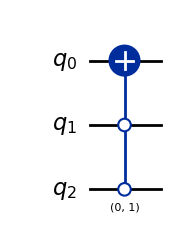

<class 'tuple'>

Circuito para la transposición: (0, 2)


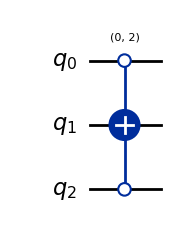

<class 'tuple'>

Circuito para la transposición: (0, 4)


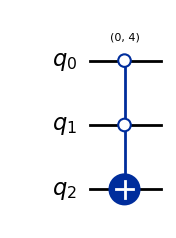

<class 'tuple'>

Circuito para la transposición: (1, 3)


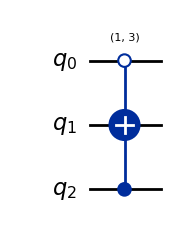

<class 'tuple'>

Circuito para la transposición: (1, 5)


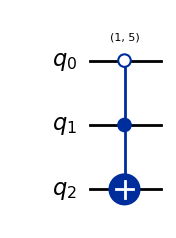

<class 'tuple'>

Circuito para la transposición: (2, 3)


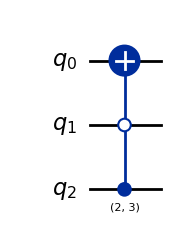

<class 'tuple'>

Circuito para la transposición: (2, 6)


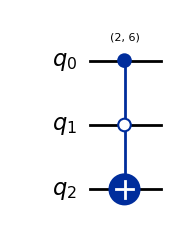

<class 'tuple'>

Circuito para la transposición: (3, 7)


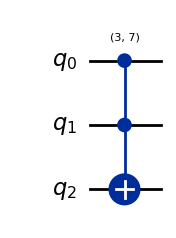

<class 'tuple'>

Circuito para la transposición: (4, 5)


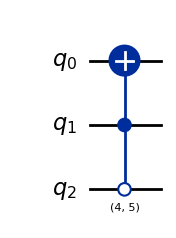

<class 'tuple'>

Circuito para la transposición: (4, 6)


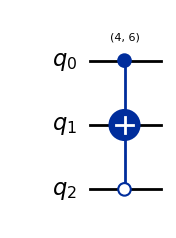

<class 'tuple'>

Circuito para la transposición: (5, 7)


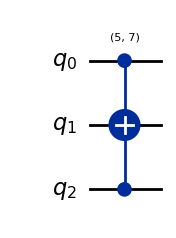

<class 'tuple'>

Circuito para la transposición: (6, 7)


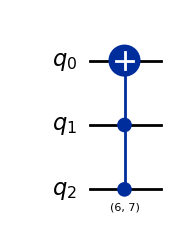

In [44]:
import math
from qiskit.circuit.library import MCXGate
from qiskit.circuit import QuantumCircuit


# --- Paso 1: Generar Diccionario Base (de antes) ---
def dictionary_generation(n : int):
    return { i : f'{i:0{n}b}' for i in range(2**n)}

# --- Paso 2: Encontrar Transposiciones (de antes) ---
def is_power_of_two(n):
    if n <= 0: return False
    return (n & (n - 1)) == 0

def find_bit_transpositions_fast(basis_dict: dict) -> list:
    transpositions = set()
    keys = list(basis_dict.keys())
    num_keys = len(keys)
    for i in range(num_keys):
        key1 = keys[i]
        for j in range(i + 1, num_keys):
            key2 = keys[j]
            xor_result = key1 ^ key2
            if is_power_of_two(xor_result):
                transpositions.add((key1, key2))
    return sorted(list(transpositions))

# --- Paso 3: Analizar Controles/Targets (de antes) ---

def analyze_transpositions(transposition_list: list, n: int) -> list:
    """
    Analiza una lista de transposiciones (pares de claves) para encontrar 
    el bit "target" y los "control" usando la convención LSB (Qiskit).
    
    q0 es el bit de la DERECHA (índice 0).
    """
    
    analysis_results = []

    for (key1, key2) in transposition_list:
        
        # 1. Encontrar el bit "Target"
        
        # xor_result es la potencia de 2 (1, 2, 4...)
        xor_result = key1 ^ key2
        
        # log2 nos da el índice del bit contando desde la DERECHA (0, 1, 2...)
        # ¡ESTE ES el índice del qubit target!
        target_bit_index = int(math.log2(xor_result))
        
        # 2. Encontrar los bits de "Control"
        
        controls = []
        # Iteramos 'i' de 0 a n-1, tratando 'i' como el índice del qubit (LSB=0)
        for i in range(n):
            # Si 'i' es el bit target, lo saltamos
            if i == target_bit_index:
                continue
            
            # Usamos bit-shift y AND para extraer el valor del bit 'i'
            # (key1 >> i) mueve el bit 'i' a la posición 0
            # & 1 nos dice si ese bit es 0 o 1
            control_value = (key1 >> i) & 1
            
            # 'i' es el índice del qubit de control
            controls.append({'index': i, 'value': control_value})

        # 3. Guardar el resultado
        analysis_results.append({
            'pair': (key1, key2),
            'target_bit': target_bit_index, # Ahora es el índice LSB
            'controls': controls
        })
        
    return analysis_results

# --- Paso 4: Generar Circuitos (Nuestro nuevo código corregido) ---
# (Aquí van las dos funciones que acabamos de corregir)
# ... transposition_circuits_associated ...
# ... generate_circuits_transpositions ...


# --- EJECUCIÓN COMPLETA (n=3) ---

from IPython.display import display

n_qubits = 3

print("Paso 1 y 2: Generando base y transposiciones...")
base_n3 = dictionary_generation(n_qubits)
transposiciones = find_bit_transpositions_fast(base_n3)

print("Paso 3: Analizando controles y targets...")
analisis_completo = analyze_transpositions(transposiciones, n_qubits)
# print("Info (0, 1):", analisis_completo[0])
# print("Info (1, 3):", analisis_completo[3])

print("Paso 4: Generando circuitos de Qiskit...")
info_final = generate_circuits_transpositions(analisis_completo)

print("\n--- ¡Confirmación! ---")
print(f"Se generaron {len(info_final)} circuitos.")

# Verifiquemos el circuito para la transposición (0, 1)
# (0, 1) -> 000 a 001
# Target: 2. Controles: 0 (en 0), 1 (en 0)



print(f"--- Mostrando los {len(info_final)} circuitos generados (n=3) ---")

for circuit_dict in info_final:
    
    # Cada 'circuit_dict' es de la forma {(par): qc}
    # .items() nos da [( (par), qc )]
    # El [0] accede al primer (y único) par clave-valor
    
    pair, qc = list(circuit_dict.items())[0]

    print(type(pair))
    
    print(f"\nCircuito para la transposición: {pair}")
    display(qc.draw('mpl'))

In [45]:
import math
from sympy.combinatorics import Permutation

# --- Funciones de ayuda (Paso 1: Encontrar generadores) ---
# (Las mismas que usamos para Qiskit)

def is_power_of_two(n):
    if n <= 0: return False
    return (n & (n - 1)) == 0

def find_bit_transpositions_fast(n: int) -> set:
    """
    Encuentra todas las transposiciones de 1 bit (generadores) para n qubits
    y las devuelve como un set de tuplas (min, max) para búsqueda rápida.
    """
    transpositions = set()
    num_keys = 2**n
    keys = list(range(num_keys))

    for i in range(num_keys):
        key1 = keys[i]
        for j in range(i + 1, num_keys):
            key2 = keys[j]
            
            xor_result = key1 ^ key2
            if is_power_of_two(xor_result):
                transpositions.add((key1, key2))
                
    return transpositions

# --- Algoritmo de Descomposición (Paso 2: El "Word Problem") ---

def decompose_transposition(a: int, b: int, generators: set) -> list:
    """
    Descompone recursivamente la transposición (a, b) en un producto 
    (lista) de generadores (transposiciones de 1 bit).
    """
    
    # 1. Creamos la permutación objetivo
    target_perm = Permutation(a, b)
    
    # 2. Caso Base: La transposición (a, b) YA es un generador
    if (min(a, b), max(a, b)) in generators:
        return [target_perm]
        
    # 3. Caso Recursivo: (a, b) no es un generador (difiere en >1 bit)
    
    # Encontramos un 'c' tal que (a, c) sea un generador.
    # Estrategia: encontrar el bit diferente de más a la derecha (LSB)
    xor_val = a ^ b
    # (xor_val & -xor_val) aísla el bit diferente menos significativo
    rightmost_diff_bit_mask = xor_val & -xor_val
    
    # Creamos 'c' volteando ESE bit en 'a'
    c = a ^ rightmost_diff_bit_mask
    
    # 'g' es la permutación (a, c). Por definición, es un generador.
    g = Permutation(a, c)
    
    # Ahora 'c' tiene un bit de diferencia menos con 'b' que 'a'
    # Resolvemos el sub-problema para (c, b)
    word_for_c_b = decompose_transposition(c, b, generators)
    
    # 4. Construimos la palabra usando la fórmula de conjugación:
    # (a, b) = g * (c, b) * g   (ya que g = g.inverse())
    final_word = [g] + word_for_c_b + [g]
    
    return final_word

# --- Función de Verificación ---
def verify_word(word: list):
    """Multiplica una lista de permutaciones (L-to-R) para verificar el resultado."""
    if not word:
        return Permutation() # Identidad
        
    result = word[0]
    for p in word[1:]:
        result = result * p # Composición L-to-R de SymPy
    return result

In [46]:
# --- Configuración para n=3 ---
n_qubits = 3
print(f"--- Descomposición para n={n_qubits} qubits ---")

# 1. Encontrar los generadores (las 12 transposiciones de 1 bit)
generators_set = find_bit_transpositions_fast(n_qubits)
print(f"Encontrados {len(generators_set)} generadores (transposiciones de 1-bit).")

# 2. Definir la transposición objetivo (la tuya)
a, b = 3, 5
target = Permutation(a, b)
print(f"\nObjetivo: Descomponer {target}")

# 3. Ejecutar la descomposición
word = decompose_transposition(a, b, generators_set)

print(f"\nPalabra (lista de generadores) encontrada:")
print(word)

# 4. Verificar el resultado
result = verify_word(word)
print(f"\nVerificación (Producto de la palabra): {result}")
print(f"¿Descomposición exitosa? -> {result == target}")

--- Descomposición para n=3 qubits ---
Encontrados 12 generadores (transposiciones de 1-bit).

Objetivo: Descomponer (3 5)

Palabra (lista de generadores) encontrada:
[Permutation(1, 3), Permutation(1, 5), Permutation(1, 3)]

Verificación (Producto de la palabra): (3 5)
¿Descomposición exitosa? -> True


--- INICIANDO EL PROCESO COMPLETO ---

--- Parte 1: Generando biblioteca de generadores para n=3 ---
Generadores de 1-bit (aristas del hipercubo): 12
Diccionario de búsqueda de circuitos (Lookup) creado.

--- Parte 2: Descomponiendo (3, 5) con SymPy ---
Palabra (word) encontrada: [Permutation(1, 3), Permutation(1, 5), Permutation(1, 3)]
Verificación de SymPy: (3 5) (Correcto: True)

--- Parte 3: Ensamblando el circuito final en Qiskit ---
Construyendo circuito para la palabra: [Permutation(1, 3), Permutation(1, 5), Permutation(1, 3)]
¡Circuito compuesto finalizado!

*** CIRCUITO FINAL PARA (3, 5) ***


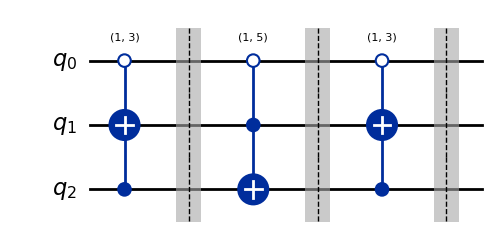

In [72]:
# ======================================================================
# --- 1. Importaciones ---
# ======================================================================
import math
from qiskit import QuantumCircuit
from qiskit.circuit.library import MCXGate
from sympy.combinatorics import Permutation
from IPython.display import display

# ======================================================================
# --- 2. Funciones de Ayuda (Bitwise/Matemáticas) ---
# ======================================================================

def is_power_of_two(n: int) -> bool:
    """Chequeo bitwise rápido para ver si n es potencia de 2."""
    if n <= 0:
        return False
    return (n & (n - 1)) == 0

# ======================================================================
# --- 3. Generación de Base (Paso 1) ---
# ======================================================================

def dictionary_generation(n : int) -> dict:
    """Genera la base computacional {int: bitstring} para n qubits."""
    return { i : f'{i:0{n}b}' for i in range(2**n)}

# ======================================================================
# --- 4. Encontrar Generadores (Paso 2 - 1-bit flips) ---
# ======================================================================

def find_bit_transpositions_fast(n: int) -> set:
    """
    Encuentra todas las transposiciones de 1 bit (generadores) para n qubits
    y las devuelve como un set de tuplas (min, max).
    """
    transpositions = set()
    num_keys = 2**n
    keys = list(range(num_keys))

    for i in range(num_keys):
        key1 = keys[i]
        for j in range(i + 1, num_keys):
            key2 = keys[j]
            
            xor_result = key1 ^ key2
            if is_power_of_two(xor_result):
                transpositions.add((key1, key2))
                
    return transpositions

# ======================================================================
# --- 5. Análisis para Qiskit (Paso 3 - Controles/Targets LSB) ---
# ======================================================================

def analyze_transpositions(transposition_list: list, n: int) -> list:
    """
    Analiza las transposiciones (generadores) para encontrar el bit "target" 
    y los "control" usando la convención LSB de Qiskit (q0=derecha).
    """
    analysis_results = []
    for (key1, key2) in transposition_list:
        xor_result = key1 ^ key2
        target_bit_index = int(math.log2(xor_result)) # q0 es LSB
        
        controls = []
        for i in range(n):
            if i == target_bit_index:
                continue
            control_value = (key1 >> i) & 1
            controls.append({'index': i, 'value': control_value})

        analysis_results.append({
            'pair': (key1, key2),
            'target_bit': target_bit_index,
            'controls': controls
        })
    return analysis_results

# ======================================================================
# --- 6. Creación de Circuitos (Qiskit - Pasos 4, 5, 6) ---
# ======================================================================

def transposition_circuits_associated(transp_info_dict : dict) -> (QuantumCircuit, tuple):
    """
    Recibe el diccionario de info de UNA transposición y devuelve
    el circuito cuántico asociado y el nombre de la transposición.
    """
    ctrl_qbits_dict = transp_info_dict['controls']
    num_ctrl_qbits = len(ctrl_qbits_dict)
    
    state_ctrl_str_list = [str(elem['value']) for elem in ctrl_qbits_dict]
    state_ctrl_str = ''.join(state_ctrl_str_list)

    list_ctrl_bits = [ elem['index'] for elem in ctrl_qbits_dict]
    idx_target_bit = transp_info_dict['target_bit']
    
    name_transposition_tuple = transp_info_dict['pair']
    name_transposition_label = str(name_transposition_tuple) # Label debe ser string

    mcx_gate = MCXGate(num_ctrl_qubits= num_ctrl_qbits,
                       label= name_transposition_label,
                       ctrl_state= state_ctrl_str)
    
    qubit_list = list_ctrl_bits
    qubit_list.append(idx_target_bit)
    
    n_qubits = num_ctrl_qbits + 1
    qc = QuantumCircuit(n_qubits)
    qc.append(mcx_gate, qubit_list)
    
    return qc, name_transposition_tuple
    

def generate_circuits_transpositions(analisis_completo: list) -> list:
    """
    Recibe la lista completa de análisis y la convierte en
    una lista de diccionarios { (par): circuito }
    """
    info_final_transpositions = []
    for transp_info_dict in analisis_completo:
        qc, trans_pair = transposition_circuits_associated(transp_info_dict)
        info_final_transpositions.append(
            { trans_pair : qc }
        )
    return info_final_transpositions

def create_circuit_lookup(info_final_list: list) -> dict:
    """
    Convierte la lista de diccionarios 'info_final' en un solo
    diccionario de búsqueda { (par): circuito } para acceso rápido.
    """
    circuit_lookup = {}
    for entry in info_final_list:
        circuit_lookup.update(entry)
    return circuit_lookup

# ======================================================================
# --- 7. Descomposición Simbólica (SymPy - Paso 7) ---
# ======================================================================

def decompose_transposition(a: int, b: int, generators: set) -> list:
    """
    Descompone recursivamente la transposición (a, b) en un producto 
    (lista) de generadores (transposiciones de 1 bit).
    """
    target_perm = Permutation(a, b)
    
    # Caso Base: (a, b) YA es un generador
    if (min(a, b), max(a, b)) in generators:
        return [target_perm]
        
    # Caso Recursivo: (a, b) difiere en >1 bit
    xor_val = a ^ b
    rightmost_diff_bit_mask = xor_val & -xor_val # Aísla el bit LSB de diferencia
    c = a ^ rightmost_diff_bit_mask # 'c' es el 'puente'
    
    g = Permutation(a, c) # g = (a, c) es un generador
    
    # Resolver sub-problema (c, b)
    word_for_c_b = decompose_transposition(c, b, generators)
    
    # Construir palabra: (a, b) = g * (c, b) * g
    final_word = [g] + word_for_c_b + [g]
    
    return final_word

def verify_word(word: list) -> Permutation:
    """Multiplica una lista de permutaciones (L-to-R) para verificar el resultado."""
    if not word:
        return Permutation() # Identidad
    result = word[0]
    for p in word[1:]:
        result = result * p
    return result

# ======================================================================
# --- 8. Ensamblaje Final (SymPy -> Qiskit - Paso 9) ---
# ======================================================================

def build_circuit_from_word(word: list, 
                            generator_lookup: dict, 
                            n_qubits: int) -> QuantumCircuit:
    """
    Construye un circuito cuántico compuesto a partir de una lista
    de permutaciones (generadores).
    """
    combined_qc = QuantumCircuit(n_qubits)
    print(f"Construyendo circuito para la palabra: {word}")
    
    for perm in word:
        # Extraer tupla (ej: (1, 3)) de la permutación
        pair_tuple = perm.cyclic_form[0]
        # Clave normalizada (min, max) para el diccionario
        key = (min(pair_tuple), max(pair_tuple))
        
        if key not in generator_lookup:
            print(f"Error: {key} no es un generador válido.")
            continue
            
        # Obtener el circuito de 1 compuerta
        qc_to_append = generator_lookup[key]
        
        # "Pegar" el circuito
        combined_qc.compose(qc_to_append, inplace=True)
        
        # Añadir barrera para legibilidad
        combined_qc.barrier()
        
    print("¡Circuito compuesto finalizado!")
    return combined_qc

# ======================================================================
# --- 9. BLOQUE DE EJECUCIÓN PRINCIPAL ---
# ======================================================================

print("--- INICIANDO EL PROCESO COMPLETO ---")

# --- Configuración Inicial ---
N_QUBITS = 3
# Transposición objetivo (ej: 2-bit flip)
TARGET_A = 3  # 011
TARGET_B = 5  # 101

# --- PARTE 1: Generar la "biblioteca" de compuertas (Generadores) ---
print(f"\n--- Parte 1: Generando biblioteca de generadores para n={N_QUBITS} ---")

# Generar las 12 transposiciones de 1-bit (para Qiskit y SymPy)
generators_set = find_bit_transpositions_fast(N_QUBITS)
generators_list_sorted = sorted(list(generators_set))
print(f"Generadores de 1-bit (aristas del hipercubo): {len(generators_set)}")

# Analizar los controles/targets para Qiskit
analisis_completo = analyze_transpositions(generators_list_sorted, N_QUBITS)

# Crear la lista de circuitos de Qiskit
info_final = generate_circuits_transpositions(analisis_completo)

# Convertir a un diccionario de búsqueda rápida
generator_circuit_lookup = create_circuit_lookup(info_final)
print("Diccionario de búsqueda de circuitos (Lookup) creado.")

# --- PARTE 2: Descomposición Simbólica (SymPy) ---
print(f"\n--- Parte 2: Descomponiendo ({TARGET_A}, {TARGET_B}) con SymPy ---")

target_transposition = Permutation(TARGET_A, TARGET_B)

# Ejecutar el algoritmo de descomposición
word_list = decompose_transposition(TARGET_A, TARGET_B, generators_set)

print(f"Palabra (word) encontrada: {word_list}")

# Verificar que la matemática funciona
verification = verify_word(word_list)
print(f"Verificación de SymPy: {verification} (Correcto: {verification == target_transposition})")

# --- PARTE 3: Ensamblaje del Circuito Final (Qiskit) ---
print(f"\n--- Parte 3: Ensamblando el circuito final en Qiskit ---")

final_circuit = build_circuit_from_word(word_list, 
                                        generator_circuit_lookup, 
                                        N_QUBITS)

# --- Mostrar Resultado ---
print(f"\n*** CIRCUITO FINAL PARA ({TARGET_A}, {TARGET_B}) ***")
display(final_circuit.draw('mpl'))

In [73]:

Statevector(final_circuit).draw('latex')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

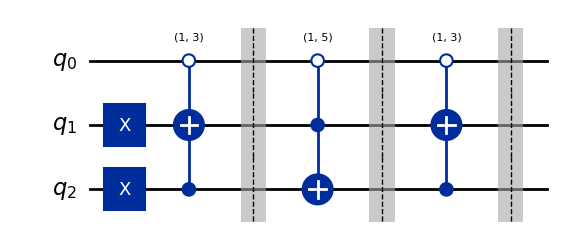

<IPython.core.display.Latex object>

In [ ]:
init_qc = QuantumCircuit(3)
init_qc.x([2, 1])



final_circuit.compose(init_qc, inplace= True, front= True)

display(Statevector(init_qc).draw('latex'))

display(final_circuit.draw('mpl'))

display(Statevector(final_circuit).draw('latex'))

